# Práctica Final MDS 2023
## 4ºC
### Mónica Samper Lario, Clara Marzal Higuero y Jimena Martínez Fernández de Tejada

## Introducción

En esta práctica vamos a realizar un estudio del archivo "airbnb-listings-extract.csv". Este documento recoge diferentes datos sobre un listado de alojamientos de Airbnb. Para realizar su estudio vamos a seguir diferentes etapas:

1. Carga de librerías y datos: 
En esta etapa, se importan las librerías necesarias para el análisis de datos y se cargan los datos del archivo CSV. Esto nos permite tener acceso a las herramientas y funciones necesarias para manipular y analizar los datos.

2. Preprocesado de los datos y análisis de datos nulos: 
En esta etapa, se realiza un preprocesamiento de los datos para asegurarse de que estén limpios y preparados para el análisis. Esto implica tratar los datos nulos o faltantes, eliminar columnas no útiles, corregir formatos de datos incorrectos, entre otros pasos. El análisis de los datos nulos nos ayuda a comprender qué variables tienen valores faltantes y cómo tratarlos.

3. Análisis descriptivo de las variables: 
En esta etapa, se realiza un análisis estadístico y descriptivo de las variables del conjunto de datos. Esto incluye calcular medidas de tendencia central, dispersión, distribución y relaciones entre variables. Proporciona una visión general de los datos y ayuda a identificar patrones, tendencias y características importantes.

4. Creación de dummies: 
En esta etapa, se crean variables dummy o variables ficticias para las variables categóricas. Esto implica convertir las variables categóricas en una representación numérica que pueda ser utilizada por los algoritmos de aprendizaje automático. Ayuda a incorporar información categórica en el análisis sin asignar un orden numérico arbitrario.

5. División del dataframe en train y test: 
En esta etapa, se divide el conjunto de datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se utiliza para ajustar y entrenar los modelos, mientras que el conjunto de prueba se utiliza para evaluar el rendimiento y la capacidad de generalización de los modelos.

6. Aplicación de distintos algoritmos:
En esta etapa, se aplican diferentes algoritmos de aprendizaje automático para realizar predicciones o modelar relaciones entre variables. 

    6.1 Regresión lineal:
La regresión lineal es un método utilizado para modelar la relación entre una variable dependiente y una o más variables independientes. Puede ayudar a identificar y cuantificar la influencia de las variables independientes en la variable dependiente. En nuestro estudio, la regresión lineal puede proporcionar información sobre cómo las diferentes variables pueden estar relacionadas con el precio de los alojamientos de Airbnb y ayudar a predecir el precio en función de esas variables.

    6.2 Árboles de decisión:
Los árboles de decisión son modelos que utilizan estructuras de árbol para tomar decisiones basadas en múltiples condiciones o características. Pueden ser útiles para identificar patrones y segmentar los datos en función de diferentes características. En nuestro estudio, los árboles de decisión pueden ayudar a identificar las características más importantes que influyen en el precio de los alojamientos y proporcionar una forma interpretable de comprender cómo se toman las decisiones en función de esas características.

    6.3 K-NN:
K-NN es un algoritmo que se utiliza para clasificar o predecir nuevos puntos de datos en función de su similitud con los puntos de datos existentes. Funciona encontrando los k puntos de datos más cercanos a un nuevo punto y tomando su clase o valor promedio. En nuestro estudio, K-NN puede ayudar a identificar los alojamientos similares en términos de características y precios, y realizar predicciones basadas en alojamientos comparables.

    6.4 Gradient Boosting:
El Gradient Boosting es una técnica de ensamblaje de modelos que combina múltiples modelos de aprendizaje débiles para crear un modelo más fuerte. Se enfoca en minimizar el error residual en cada iteración y ajusta los pesos de los modelos individuales. En nuestro estudio, el Gradient Boosting puede mejorar la precisión de las predicciones del precio de los alojamientos de Airbnb al combinar varios modelos y aprovechar sus fortalezas individuales.

    6.5 Bagging:
Bagging es una técnica de ensamblaje que combina múltiples modelos de aprendizaje independientes entre sí. Cada modelo se entrena en una muestra aleatoria del conjunto de datos y luego se promedian las predicciones para tomar la decisión final. En nuestro estudio, el Bagging puede reducir la variabilidad y mejorar la estabilidad de las predicciones al considerar diferentes perspectivas de modelos.

    6.6 Boosting:
El Boosting es otra técnica de ensamblaje que se basa en la secuencialidad de los modelos. Cada modelo se entrena en función de los errores cometidos por el modelo anterior, y se da más importancia a los datos mal clasificados o mal predichos. En nuestro estudio, el Boosting puede ayudar a mejorar gradualmente las predicciones de los alojamientos de Airbnb al enfocarse en los errores y ajustar los modelos subsiguientes en consecuencia.

7. Clustering:
En esta etapa, se realiza el análisis de clustering para identificar grupos o clusters naturales en los datos. Esto ayuda a encontrar patrones o segmentos similares en los datos sin la necesidad de etiquetas predefinidas. Puede proporcionar información sobre la estructura subyacente de los datos y ayudar en la segmentación y comprensión de los grupos.

## 1.Carga de Librerías y Datos

### Carga de librerías

En primer lugar, vamos a empezar por cargar todas las librerías que creamos que son necesarias para realizar la práctica. 

In [107]:
import numpy as np
import pandas as pd 
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import plotly.graph_objects as go
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, SpectralClustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy import stats
# pip install folium
import folium
from folium.plugins import MarkerCluster


### Carga de datos

La siguiente celda nos permite saber el directorio en el que se encuentra el archivo.

In [108]:
import os

# Obtener el directorio actual
current_dir = os.getcwd()

# Imprimir el directorio actual
print("El directorio actual es:", current_dir)

El directorio actual es: /Users/claramarzal/Desktop/CUNEF/Master/4º/Modelos Supervisados/Practica_Final


Esta celda sirve exclusivamente para cargar los datos en el ordenador de una de las alumnas que realizan la práctica, ya que cada una tiene el archivo guardado en diferentes sitios.

#### Importación de datos Colab en ordenador de Clara:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Master_4º/airbnb-listings-extract.csv", sep=';', decimal='.')
df.head()

Esta otra celda es una vez más la carga de datos, en el caso de no utilizar la celda previamente mostrada.

In [109]:
df = pd.read_csv('airbnb-listings-extract.csv', sep=';', decimal='.')
df.head()

ID                            Listing Url       Scrape ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   
2  17584891  https://www.airbnb.com/rooms/17584891  20170407214050   
3  5398030   https://www.airbnb.com/rooms/5398030   20170407214050   
4  18104606  https://www.airbnb.com/rooms/18104606  20170407214050   

  Last Scraped                                 Name  \
0  2017-03-07   The Loft-Full Bath-Deck w/View        
1  2017-04-08   Claris I, Friendly Rentals            
2  2017-04-08   Style Terrace Red, Friendly Rentals   
3  2017-04-08   Picasso Suite 1.4 Paseo de Gracia     
4  2017-04-08   Smart City Centre Apartment II        

                                                                                                                                                                                                                                                                                                                                                                                                     Summary  \
0  Loft in the Hill country 12-15 minutes directly west of downtown Austin.  It has a private deck that has a spectacular view of the surrounding hills. Equipped with Queen Bed, Refrigerator, microwave, TV w/Cable, Microwave, Wifi, A/C,Coffee Maker, etc                                                                                                                                                  
1  This apartment has: 1 double bed, 1 double sofa bed. Right next to Plaza Cataluña A spacious and bright one bedroom apartment in one of the best locations in Barcelona. Only steps away from Plaza Cataluña and Paseo de Gracia which allows you the benefit of culture, cuisine and fantastic shopping… all at your fingertips! The building has an elevator but there are eleven steps to climb first.   
2  This apartment has: 1 double bed, 1 double sofa bed. Excellent location and with terrace Ideally situated right between Paseo de Gracia and Rambla Cataluña, this apartment offers guests the luxury of fine dining, shopping and famous sights right on their doorstep.   All this and the added bonus of a private rooftop terrace - you can't ask for more.                                              
3  Live like a local in Barcelona's most chic district when you rent this effortlessly luxurious three-bedroom, two bathroom home, blocks from Passeig de Gracia. With a sun-splashed rooftop terrace and super-central Dreta de l'Eixample location, Picasso Suites is your modern home away from home (Spanish breakfast included!). Local permit: HUTB-006794                                               
4  Unique apartment in vibrant neighborhoods, carefully selected by expert to make sure you like them as much as we do. A local concierge will welcome you and guide you during your entire stay to assist you in everything you may need.                                                                                                                                                                     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

En primer lugar vamos a eliminar columnas que no resultan útiles para nuestro análisis. Finalmente tendremos un dataframe que consta de 27 columnas.

In [110]:

not_useful_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count'
]

somehow_useful_columns_but_droppable_anyway = ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About'
]

columns_with_too_many_missing_values = [
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names'
]

df.drop(not_useful_columns, axis=1, inplace=True)
df.drop(somehow_useful_columns_but_droppable_anyway, axis=1, inplace=True)
df.drop(['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode'], axis=1, inplace=True)
df.drop(columns_with_too_many_missing_values, axis=1, inplace=True)

reviews = df.loc[:, "Review Scores Rating":"Review Scores Value"]
df['Average Review'] = reviews.mean(axis=1)

df.drop(['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
        'Accommodates'], axis=1, inplace=True)

df = df[df['Price'] < 200]

df["Final Neighbourhood"] = df["Neighbourhood Group Cleansed"].fillna(df["Neighbourhood Cleansed"])
df.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)

df['Features'].fillna("", inplace=True) # rellenamos los huecos con cadenas vacías
df['Amenities'].fillna("", inplace=True)
df['Host Verifications'].fillna("", inplace=True)

df['Features'] = df['Features'].apply(lambda x: len(str(x).split(',')))
df['Amenities'] = df['Amenities'].apply(lambda x: len(str(x).split(',')))
df['Host Verifications'] = df['Host Verifications'].apply(lambda x: len(str(x).split(',')))

df['Host Since'] = pd.to_datetime(df['Host Since'], errors='coerce')
df['Years Being Host'] = np.where(df['Host Since'].isnull(), np.nan, 2017 - df['Host Since'].dt.year)
df.drop(['Host Since'], axis=1, inplace=True)

df["Host Response Time"].fillna(df["Host Response Time"].mode()[0], inplace=True)
df.drop(['Experiences Offered'], axis=1, inplace=True)
df.drop(['Country Code'], axis=1, inplace=True)

print(df.shape)

(14105, 27)


In [111]:
df.head()

Host Response Time  Host Response Rate  Host Verifications       City  \
0  within an hour     100.0               4                   Austin      
1  within an hour     100.0               4                   Barcelona   
2  within an hour     100.0               4                   Barcelona   
4  within an hour     99.0                4                   Barcelona   
5  within an hour     99.0                4                   Barcelona   

    Latitude  Longitude Property Type        Room Type  Bathrooms  Bedrooms  \
0  30.337361 -97.863277  Loft          Entire home/apt  1.0        1.0        
1  41.389683  2.172625   Apartment     Entire home/apt  1.0        1.0        
2  41.393035  2.162173   Apartment     Entire home/apt  1.0        1.0        
4  41.388685  2.155150   Apartment     Entire home/apt  1.0        2.0        
5  41.382537  2.149577   Apartment     Entire home/apt  1.0        2.0        

   ...  Extra People Minimum Nights  Maximum Nights  Availability 365  \
0  ...  0             2              1125            281                
1  ...  44            1              1125            309                
2  ...  42            1              1125            291                
4  ...  0             2              1125            7                  
5  ...  0             2              1125            4                  

   Number of Reviews  Cancellation Policy  Features  Average Review  \
0  42                 moderate             4         22.571429        
1  1                  super_strict_30      3         19.428571        
2  0                  super_strict_30      3        NaN               
4  0                  flexible             5        NaN               
5  0                  strict               5        NaN               

   Final Neighbourhood  Years Being Host  
0  78733                1.0               
1  Eixample             1.0               
2  Eixample             1.0               
4  Eixample             1.0               
5  Eixample             1.0               

[5 rows x 27 columns]

La función definida a continuación, remove_entries, cuenta y elimina los elementos de una columna del DataFrame que tienen menos de n registros, y luego muestra un gráfico de barras con el número de registros por elemento. También nos muestra el número de registros eliminados y el número de elementos distintos restantes.

In [112]:
from collections import Counter

def remove_entries(df, n, col, element_name):
    nb_counts = Counter(df[col])
    inicial = df.shape[0]
    
    # Borramos elementos con menos de n registros
    for i in list(nb_counts):
        if nb_counts[i] < n:
            del nb_counts[i]
            df = df[df[col] != i]

    # Dibujamos
    tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
    ax = tdf.plot(kind='bar', figsize = (22,4), color = '#007A87', alpha = 0.85)
    ax.set_title(f"{element_name} por número de registros")
    ax.set_xlabel(f"{element_name}")
    ax.set_ylabel("# de registros")

    plt.show()

    print('Número de registros eliminado: ', inicial - df.shape[0])
    print(f"Número de {element_name}s:", len(nb_counts))
    
    return df

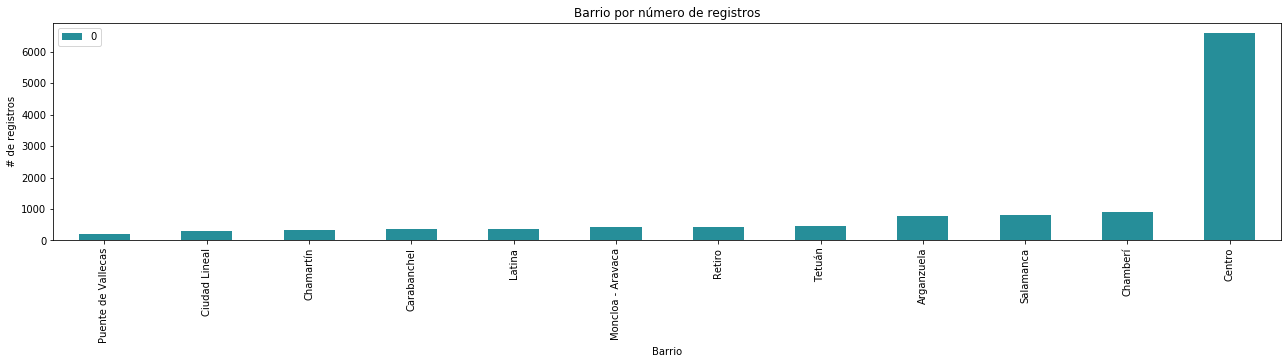

Número de registros eliminado:  2114
Número de Barrios: 12


In [113]:
df = remove_entries(df, 200, "Final Neighbourhood", "Barrio")

Hemos seleccionado para nuestro análisis aquellos valores cuyo barrio se encuentra en Madrid (Puente de Vallecas, Ciudad Lineal, Chamartín, Carabanchel, Moncloa-Aravaca, Retiro, Tetúan, Arganzuela, Salamanca, Chamberí o el Centro).

In [114]:
df.columns

Index(['Host Response Time', 'Host Response Rate', 'Host Verifications',
       'City', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy', 'Features',
       'Average Review', 'Final Neighbourhood', 'Years Being Host'],
      dtype='object')

La función describe() la utilizamos para calcular y mostrar estadísticas descriptivas de los datos.

Cuando se aplica la función describe() a un DataFrame, proporciona un resumen estadístico de cada columna numérica en el DataFrame, que incluye:

- Recuento (count): El número de valores no nulos en la columna.
- Media (mean): El promedio de los valores en la columna.
- Desviación estándar (std): La medida de dispersión de los valores en la columna.
- Valor mínimo (min): El valor mínimo en la columna.
- Percentiles (25%, 50%, 75%): Los valores que dividen los datos en cuartiles.
- Valor máximo (max): El valor máximo en la columna.

In [115]:
df.describe()

Host Response Rate  Host Verifications      Latitude     Longitude  \
count  10515.000000        11991.000000        11991.000000  11991.000000   
mean   95.056681           4.118089            40.419683    -3.700249       
std    14.556738           1.282551            0.015956      0.018008       
min    0.000000            1.000000            40.361603    -3.835498       
25%    100.000000          3.000000            40.410246    -3.708053       
50%    100.000000          4.000000            40.418103    -3.702111       
75%    100.000000          5.000000            40.426871    -3.695559       
max    100.000000          10.000000           40.484122    -3.628429       

          Bathrooms      Bedrooms          Beds     Amenities         Price  \
count  11953.000000  11969.000000  11954.000000  11991.000000  11991.000000   
mean   1.220991      1.243964      1.912916      14.243683     60.589359      
std    0.554358      0.743152      1.359941      4.636962      35.812800      
min    0.000000      0.000000      1.000000      1.000000      9.000000       
25%    1.000000      1.000000      1.000000      11.000000     32.000000      
50%    1.000000      1.000000      1.000000      14.000000     53.000000      
75%    1.000000      1.000000      2.000000      17.000000     80.000000      
max    8.000000      10.000000     16.000000     34.000000     199.000000     

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count  5224.000000       7269.000000   11991.000000     11991.000000   
mean   178.016654        27.485211     1.557335         7.458094       
std    100.881233        18.434901     0.996254         10.178969      
min    70.000000         4.000000      1.000000         0.000000       
25%    100.000000        15.000000     1.000000         0.000000       
50%    150.000000        25.000000     1.000000         5.000000       
75%    200.000000        33.000000     2.000000         15.000000      
max    990.000000        250.000000    16.000000        276.000000     

       Minimum Nights  Maximum Nights  Availability 365  Number of Reviews  \
count  11991.000000    11991.000000    11991.000000      11991.000000        
mean   2.951881        969.954716      203.724960        24.184055           
std    12.557256       9366.497931     126.824688        39.452877           
min    1.000000        1.000000        0.000000          0.000000            
25%    1.000000        365.000000      81.000000         1.000000            
50%    2.000000        1125.000000     245.000000        8.000000            
75%    3.000000        1125.000000     319.000000        30.000000           
max    1125.000000     1000000.000000  365.000000        446.000000          

           Features  Average Review  Years Being Host  
count  11991.000000  9515.000000     11988.000000      
mean   3.772162      21.234900       2.713630          
std    1.031673      2.223496        1.619928          
min    1.000000      4.857143        0.000000          
25%    3.000000      20.571429       1.000000          
50%    4.000000      21.714286       2.000000          
75%    4.000000      22.428571       4.000000          
max    8.000000      80.000000       8.000000

En la siguiente celda podemos ver los diferentes datos mostrados en la columna "Property Type".

In [116]:
df['Property Type'].unique()

array(['Apartment', 'Other', 'Loft', 'House', 'Condominium', 'Dorm',
       'Bed & Breakfast', 'Tent', 'Hostel', 'Guesthouse', 'Townhouse',
       'Chalet', 'Camper/RV', 'Serviced apartment', 'Villa',
       'Boutique hotel', 'Casa particular', 'Timeshare', 'Bungalow',
       'Guest suite', 'Earth House'], dtype=object)

In [117]:
pd.set_option('display.max_colwidth', 0)

df[['Property Type', 'Room Type', 'Bed Type', 'Guests Included', 'Cancellation Policy', 'Host Response Rate']].agg(['unique']).transpose()

      

unique
Property Type        [Apartment, Other, Loft, House, Condominium, Dorm, Bed & Breakfast, Tent, Hostel, Guesthouse, Townhouse, Chalet, Camper/RV, Serviced apartment, Villa, Boutique hotel, Casa particular, Timeshare, Bungalow, Guest suite, Earth House]                                                                                                                                                                                
Room Type            [Private room, Entire home/apt, Shared room]                                                                                                                                                                                                                                                                                                                                                                          
Bed Type             [Real Bed, Pull-out Sofa, Futon, Couch, Airbed]                                                                                                                                                                                                                                                                                                                                                                       
Guests Included      [1, 2, 3, 4, 5, 6, 7, 8, 16, 12, 15, 10]                                                                                                                                                                                                                                                                                                                                                                              
Cancellation Policy  [flexible, moderate, strict, super_strict_60, super_strict_30]                                                                                                                                                                                                                                                                                                                                                        
Host Response Rate   [84.0, 100.0, 90.0, 98.0, 73.0, nan, 67.0, 89.0, 0.0, 92.0, 83.0, 94.0, 75.0, 86.0, 91.0, 85.0, 80.0, 95.0, 55.0, 97.0, 50.0, 99.0, 25.0, 70.0, 96.0, 40.0, 57.0, 93.0, 11.0, 79.0, 78.0, 33.0, 64.0, 88.0, 38.0, 76.0, 59.0, 60.0, 71.0, 69.0, 81.0, 63.0, 82.0, 27.0, 46.0, 65.0, 41.0, 29.0, 30.0, 68.0, 20.0, 35.0, 43.0, 74.0, 87.0, 9.0, 72.0, 62.0, 56.0, 77.0, 47.0, 13.0, 42.0, 54.0, 26.0, 44.0, 61.0, 24.0]

## 2.Preprocesado de los Datos. Análisis de datos nulos


En primer lugar vamos a calcular la cantidad de valores nulos que encontramos para cada una de las columnas, para posteriormente tratarlos. En la columna total vemos el recuento de valores NA y en la columna Percent aparece como porcentaje en relación con todos los valores que contiene dicha variable.

In [118]:
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(50)

Total    Percent
Security Deposit     6767   56.433992
Cleaning Fee         4722   39.379535
Average Review       2476   20.648820
Host Response Rate   1476   12.309232
Bathrooms            38     0.316904 
Beds                 37     0.308565 
Bedrooms             22     0.183471 
Years Being Host     3      0.025019 
City                 2      0.016679 
Extra People         0      0.000000 
Number of Reviews    0      0.000000 
Cancellation Policy  0      0.000000 
Availability 365     0      0.000000 
Maximum Nights       0      0.000000 
Features             0      0.000000 
Final Neighbourhood  0      0.000000 
Minimum Nights       0      0.000000 
Host Response Time   0      0.000000 
Guests Included      0      0.000000 
Amenities            0      0.000000 
Bed Type             0      0.000000 
Room Type            0      0.000000 
Property Type        0      0.000000 
Longitude            0      0.000000 
Latitude             0      0.000000 
Host Verifications   0      0.000000 
Price                0      0.000000

Observamos como la mayoría de variables no tienen valores NA, sin embargo hay 9 columnas que sí y debemos modificarlos para continuar.
La columna Security Deposit tiene un mayor porcentaje de valores nulos que de valores correctos; y en el caso de Cleaning Fee, Average Review y Host Response Rate, este porcentaje también es elevado.

### Tratamiento de Datos Nulos

En las columnas Average Review, Security Deposit, Cleaning Fee, Years Being Host y Host Response Rate vamos a reemplazar los valores NA por un '0'. Ya que ese valor nulo se debe a que quizás nunca han recibido un review porque no se ha alquilado nunca, o porque los anfitriones deciden no cobrar por limpieza.

In [119]:
df['Average Review'].fillna(0, inplace=True)
df['Security Deposit'].fillna('0.00', inplace=True)
df['Cleaning Fee'].fillna('0.00', inplace=True)
df['Years Being Host'].fillna(0, inplace=True)
df['Host Response Rate'].fillna(0, inplace=True)

Además vamos a eliminar de dataframe los valores NA de las columnas Bathrooms, Bedrooms y Beds porque no aportan información relevante.

In [120]:
df.dropna(subset=['Bathrooms', 'Bedrooms', 'Beds'], inplace=True)

In [121]:
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(50)

Total   Percent
City                 2      0.016777
Host Response Time   0      0.000000
Security Deposit     0      0.000000
Final Neighbourhood  0      0.000000
Average Review       0      0.000000
Features             0      0.000000
Cancellation Policy  0      0.000000
Number of Reviews    0      0.000000
Availability 365     0      0.000000
Maximum Nights       0      0.000000
Minimum Nights       0      0.000000
Extra People         0      0.000000
Guests Included      0      0.000000
Cleaning Fee         0      0.000000
Price                0      0.000000
Host Response Rate   0      0.000000
Amenities            0      0.000000
Bed Type             0      0.000000
Beds                 0      0.000000
Bedrooms             0      0.000000
Bathrooms            0      0.000000
Room Type            0      0.000000
Property Type        0      0.000000
Longitude            0      0.000000
Latitude             0      0.000000
Host Verifications   0      0.000000
Years Being Host     0      0.000000

Observamos como el número de NAs se ha reducido tras la intervención.

## 3.Análisis Descriptivo de las Variables

A continuación vamos a comenzar con el análisis descriptivo de las variables. Es especialmente importante en esta práctica ya que estamos tratando de construir un generador de precios que tomará en cuenta todas las variables y las relaciones y diferencias que observemos entre ellas, para generar un precio final para cada propiedad.

#### Distribución de Room Type

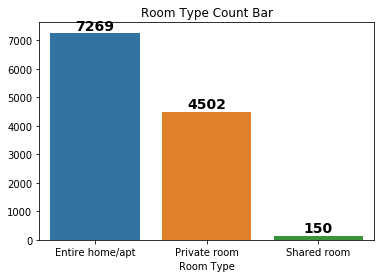

In [123]:
room_type_plot = sns.countplot(x="Room Type", order = df['Room Type'].value_counts().index, data=df)
room_type_plot.set(xlabel='Room Type', ylabel='', title='Room Type Count Bar')
for bar in room_type_plot.patches:
    h = bar.get_height()
    room_type_plot.text(
        bar.get_x() + bar.get_width()/2.,  # bar index (x coordinate of text)
        h,                                 # y coordinate of text
        '%d' % int(h),                     # y label
        ha='center', 
        va='bottom',
        color='black',
        fontweight='bold',
        size=14)
    
plt.show()

En primer lugar vamos a analizar la variable Room Type, que tiene 3 valores distintos. Para el valor 'Entire home/apt' tenemos un total de 7269 opciones en Madrid, seguidamente tenemos 4502 para 'Private room' y por último tan solo 150 para el tipo 'Shared room'. La mayoría de clientes tienden a buscar un apartamento completo o una habitación privada por lo que no es especialmente relevante que el número de habitaciones compartidas sea bajo.

#### Distribución según las coordenadas

A continuación analizaremos la ubicación de las propiedades basándonos en sus referecias de coordenadas por latitud y longitud.

In [124]:
coordenadas = df[['Latitude', 'Longitude']].copy()
coordenadas

Latitude  Longitude
40     40.406953 -3.670894 
41     40.425904 -3.681647 
42     40.428352 -3.687155 
43     40.427454 -3.685763 
44     40.428671 -3.685423 
...          ...       ... 
14735  40.423915 -3.714937 
14736  40.422233 -3.715891 
14748  40.388393 -3.739677 
14754  40.394747 -3.668329 
14755  40.385395 -3.669958 

[11921 rows x 2 columns]

In [125]:

# Crear un mapa centrado en Madrid
madrid_map = folium.Map(location=[40.4168, -3.7038], zoom_start=12)

# Crear un grupo de marcadores
marker_cluster = MarkerCluster().add_to(madrid_map)

# Añadir marcadores para cada punto de ubicación de Airbnb al grupo de marcadores
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(marker_cluster)

# Mostrar el mapa
madrid_map


En el mapa que tenemos arriba podemos observar mediante puntos naranjas aquellas zonas con una mayor aglutinación de propiedades, en amarillo aparecen zonas que no superan los 100 Airbnbs y en verde aquellas que no superan los 10 Airbnbs.
Si hacemos zoom sobre el mapa podemos observar los distintos barrios que encontramos en nuestro dataframe. El barrio de Madrid Centro es el que tiene un mayor número de Airbnbs, con un total de 7164, a continuación encontramos el barrio de Retiro con 1206 y en tercer lugar el barrio de Salamanca con 1120. A simple vista podemos observar como la mayoría se encuentran en la zona más céntrica de Madrid ciudad, sin embargo también encontramos un número elevado de propiedades en la zona de Madrid Norte y en la Latina y al sureste de la ciudad.
Las zonas donde menos Airbnbs hay son en Pozuelo y Majadahonda, zonas también más alejadas del centro de la ciduad.

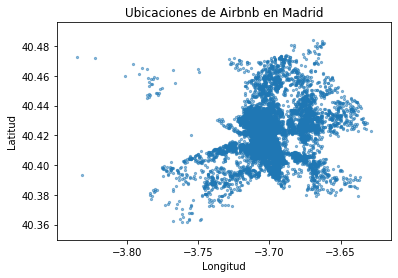

In [126]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión con los puntos de Airbnb
plt.scatter(df['Longitude'], df['Latitude'], s=5, alpha=0.5)

# Configurar el título y etiquetas de los ejes
plt.title("Ubicaciones de Airbnb en Madrid")
plt.xlabel("Longitud")
plt.ylabel("Latitud")

# Mostrar el gráfico
plt.show()

#### Distribución de precios

Seguidamente vamos a analizar la distribución de los precios. Estos es previsible que varíen fuertemente en función de la zona en la que se encuentren, además de su tamaño y características.
En primer lugar utilizaremos la función describe() para hacer un análisis inicial de sus valores, tenemos un total de 11921 propiedades con una media de precio de 60 euros la noche, un mínimo precio de 9 euros y un máximo de 199 euros.

In [127]:
df['Price'].describe()

count    11921.000000
mean     60.630736   
std      35.817943   
min      9.000000    
25%      32.000000   
50%      53.000000   
75%      80.000000   
max      199.000000  
Name: Price, dtype: float64

El siguiente Boxplot nos permitirá detectar posibles valores atípicos que puedan distorsionar gravemente nuestra muestra de estudio.

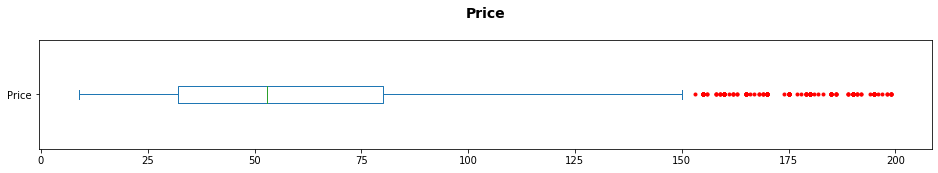

In [128]:
box_plot = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
price_dist = df['Price'].plot(kind='box', vert=False, flierprops=box_plot, title = "Price", figsize=(16,2));
plt.title('Price\n', fontsize=14, fontweight='bold')
price_dist

No encontramos un número suficientemente alto de outliers que pudieran afectar al análisis distorsionando los resultados, por lo que optamos por no eliminar ningun valor. Además cabe destacar que la mayoría de precios se sitúan en torno a los 30-80 euros por noche y únicamente unos cuantos superan los 150 euros por noche.

#### Distribución de Property Type

En este apartado vamos a analizar los distintos tipos de propiedad.

Text(0.5, 1.0, 'Property Type Distribution\n')

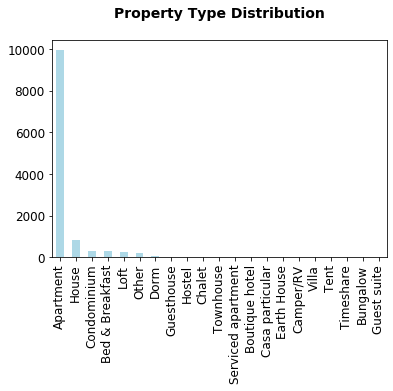

In [129]:
property_df = df['Property Type'].value_counts()
property_df.columns = ['property_type']
property_df.plot.bar(y= 'property_type', 
                     color = 'LightBlue',
                     fontsize = 12,
                     legend = False,
                     figsize= (6, 4))

plt.title('Property Type Distribution\n', fontsize=14, fontweight='bold')

In [130]:
df['Property Type'].value_counts()

Apartment             9957
House                 813 
Condominium           301 
Bed & Breakfast       296 
Loft                  251 
Other                 186 
Dorm                  34  
Guesthouse            32  
Hostel                14  
Chalet                7   
Townhouse             6   
Serviced apartment    5   
Boutique hotel        5   
Casa particular       3   
Earth House           3   
Camper/RV             2   
Villa                 2   
Tent                  1   
Timeshare             1   
Bungalow              1   
Guest suite           1   
Name: Property Type, dtype: int64

En la ciudad de Madrid hay un total de 9957 apartamentos ofertados por Airbnb, seguidamente 813 casas y 301 condominios. Es curioso resaltar que en Airbnb solo aparecen listados uno de las siguientes categorías: una habitación Guest Suite, un Bungalow, un Timeshare (que consiste en un tipo de alojamiento con un régimen de tiempo compartido para su uso) y un Carpa.

In [131]:
len(df['Property Type'].value_counts())

21

Debido a que encontramos 21 tipos de propiedad, vamos a reducirlas creado 5 nuevas categorias: apartamento, casa, hotel1, hotel2 y otros.

In [132]:
dict1 = {'Apartment':['Condominium','Timeshare','Loft','Serviced apartment','Guest suite'],
         'House':['Vacation home','Villa','Townhouse','In-law','Casa particular', 'Chalet'],
         'Hotel1':['Dorm','Hostel','Guesthouse'],
         'Hotel2':['Boutique hotel','Bed & Breakfast'],
         'Other':['Island','Castle','Yurt','Hut','Treehouse',
                  'Earth House','Tipi','Cave','Train','Parking Space','Lighthouse',
                 'Tent','Boat','Cabin','Camper/RV','Bungalow']
        }
dict2 = {i : k for k, v in dict1.items() for i in v}
df['Property Type'] = df['Property Type'].replace(dict2)
df['Property Type'].replace(dict2).value_counts()


Apartment    10516
House        831  
Hotel2       301  
Other        193  
Hotel1       80   
Name: Property Type, dtype: int64

In [133]:
# esto se puede borrar no?
df['Host Response Time'].unique()

array(['within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

#### Distribución de Final Neighbourhood

A continuación analizaremos los distintos Barrios en Madrid.

In [134]:
df['Final Neighbourhood'].describe()

count     11921 
unique    12    
top       Centro
freq      6548  
Name: Final Neighbourhood, dtype: object

Text(0.5, 1.0, 'Mean Prices by Neighbourhood\n')

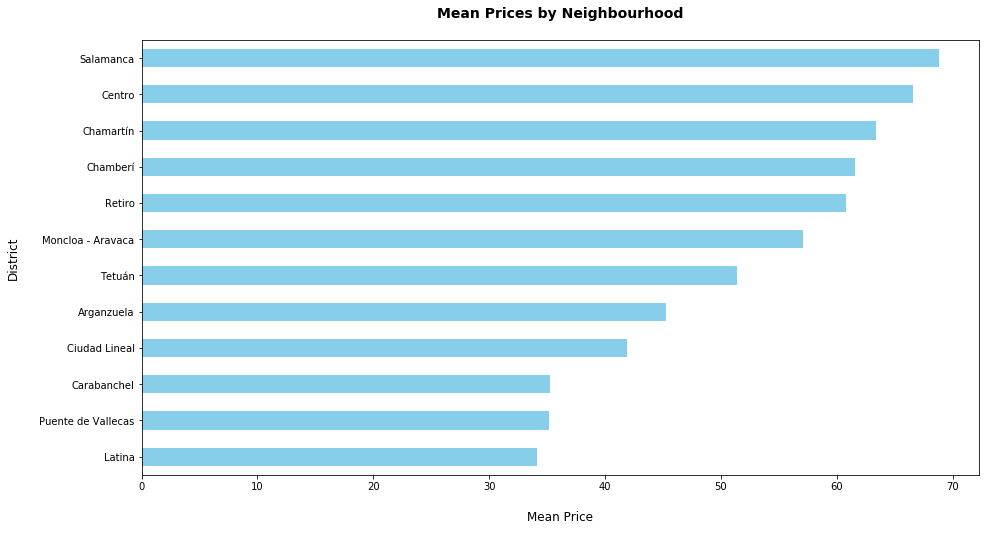

In [135]:
df_grouped = pd.DataFrame(df.groupby(['Final Neighbourhood'])['Price'].agg(np.mean))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['Price'], ascending=True)\
          .plot(kind='barh', x='Final Neighbourhood', y='Price', 
                figsize=(15,8), legend=False, color='skyblue')

plt.xlabel('\nMean Price\n', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('Mean Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

Como podemos observar en la tabla anterior, el barrio con los precios más altos de Airbnb es el barrio de Salamanca, donde la media llega a los 70 euros por noche, seguido del Centro. En el otro extremo tenemos Latina con un precio medio de 33 euros por noche, y por 36 euros por noche aproximadamente encontramos propiedades en Puente de Vallecas.
Es relevante tener en cuenta que esto supone que una noche en un Airbnb en el barrio de Salamanca puede doblar en precio una propiedad que podamos encontrar en la Latina.

In [ ]:
sns.set(style="whitegrid")
# Parameters
FILTER_PRICE_VALUE = 800

# Filter airbnb prices for shake of the visualization
sub_airbnb_price = df[df.Price < FILTER_PRICE_VALUE]

# Create ViolinPlot
fig, ax = plt.subplots(figsize=(18, 12))
density_neigh_price_plot = sns.violinplot(ax=ax, x="Final Neighbourhood", y="Price", 
                                          hue="Final Neighbourhood", data=sub_airbnb_price, 
                                          palette="plasma", dodge=False, legend=True)
density_neigh_price_plot.set(xlabel='Final Neighbourhood Group', ylabel='Price ($)', 
                             title='Density and Distribution of prices for each Neighberhood Group')
ylabels = ['${}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)

# Ajustar posición de la leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


En el gráfico anterior podemos diferenciar tres grupos según sus precios y barrio. En el precio más alto podríamos agrupar el barrio de Salamanca, cuyos precios se distribuyen en torno a los 40-90 euros por noche, a continuación el barrio de Retiro, cuyos valores son similares y también el barrio del Centro.
En el segundo grupo podríamos agrupar los barrios de Chamartín, Moncloa-Aravaca y Chamberí. Sus precios se distribuyen en torno a los 40-75 euros por noche.
Y en el último grupo encontraríamos los barrios de Tetúan, Arganzuela, Ciudad Lineal, Carabanchel, Puente de Vallecas y Latina. Sus precios varían en torno a los 25-60 euros por noche.

#### Número de Reviews

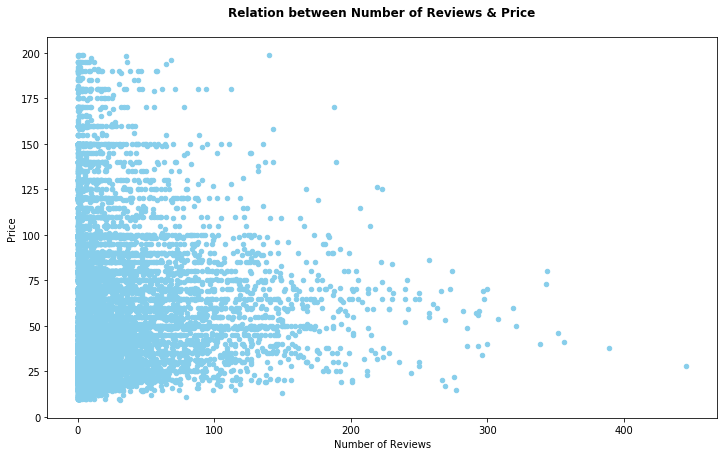

In [30]:
df.plot.scatter(x="Number of Reviews", y="Price", figsize=(12,7), c='skyblue')
plt.title('Relation between Number of Reviews & Price\n', fontsize=12, fontweight='bold');

El mayor número de Reviews lo encontramos en los apartamentos cuyo precio se encuentra desde el precio más bajo hasta los 100 euros por noche, a medida que aumenta el precio el número de reseñas disminuye. Esto se debe a que menos clientes se hospedan en propiedades cuyo precio supera los 100 o 125 euros por noche y además el número que encontramos de estos en Airbnb, también es menor.

#### Relación entre Final Neighbourhood y Availability 365

En este apartado vamos a evaluar la relación entre el barrio y la disponibilidad de la propiedad. Para ello vamos a crear un boxplot que nos permita ver la distribución de la variable Availability 365 (durante todo el año) para cada uno de los barrios.

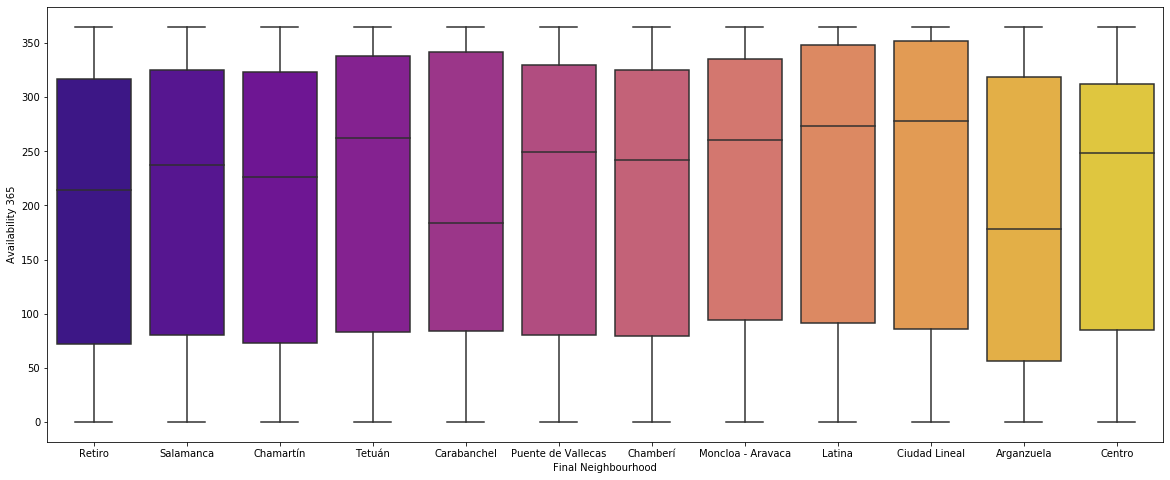

In [31]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, x='Final Neighbourhood',y='Availability 365',palette='plasma')

#### Mapa de grupo de Final Neighbourhood

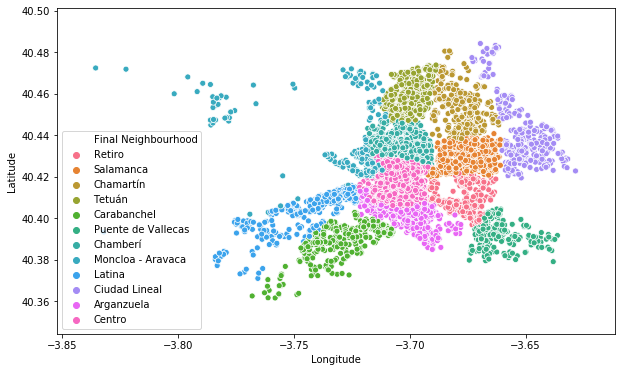

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.Longitude,df.Latitude,hue=df['Final Neighbourhood'])
plt.ioff()

Esta gráfica nos permite visualizar a nivel de longitud y latitud donde se sitúa cada barrio de Madrid, gracias a los diferentes colores podemos ver la división de barrios. Además podemos observar donde se aglomeran más alojamientos.

Por lo general, donde más alojamientos aglomerados encontramos es toda la zona central de Madrid: Centro, Chamberí, Retiro, Salamanca...

#### Mapa de tipo de Room Type

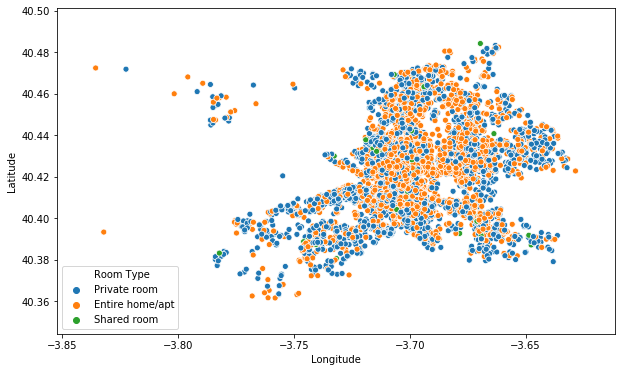

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.Longitude,df.Latitude,hue=df['Room Type'])
plt.ioff()

A partir de la gráfica anterior y de esta última podemos observar la repartición geográfica de los tipos de habitación de los alojamientos disponibles. En la zona más central, en concreto en los barrios mencionados previamente, los alojamientos parecen ser principalmente apartamentos o casas enteras a alquilar. Cuanto más nos aljamos del centro, encontramos más habitaciones privadas y en general, encontramos pocas habitaciones compartidas en Madrid.

#### Mapa de Availability 365

In [142]:
df['Availability 365'].value_counts()

0      1032
365    373 
364    147 
311    137 
281    134 
      ...  
208    7   
191    6   
213    6   
183    5   
200    4   
Name: Availability 365, Length: 366, dtype: int64

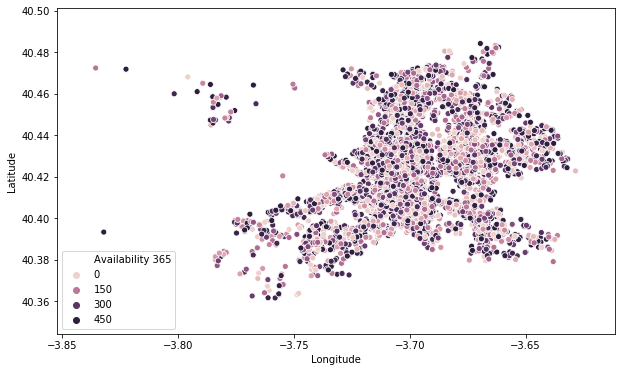

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.Longitude,df.Latitude,hue=df['Availability 365'])
plt.ioff()

Esta gráfica, nos muestra la disponibilidad 365 de los alojamientos también por su zona geográfica. Por lo general, la mayor parte de los alojamientos no presentan una disponibilidad 365 días del año. Sin embargo, si que hay alojamientos que presentan una disponibilidad bastante alta durante el año. En concreto en lo que parece ser el centro de Madrid, parece haber menos disponibilidad.

#### Análisis de correlación

La siguiente celda de código calcula y muestra una matriz de correlación con un mapa de calor que representa visualmente las correlaciones entre las variables numéricas en el DataFrame df. El esquema de colores utilizado resalta las correlaciones más fuertes en tonos más intensos, mientras que las correlaciones más débiles se muestran en tonos más suaves.

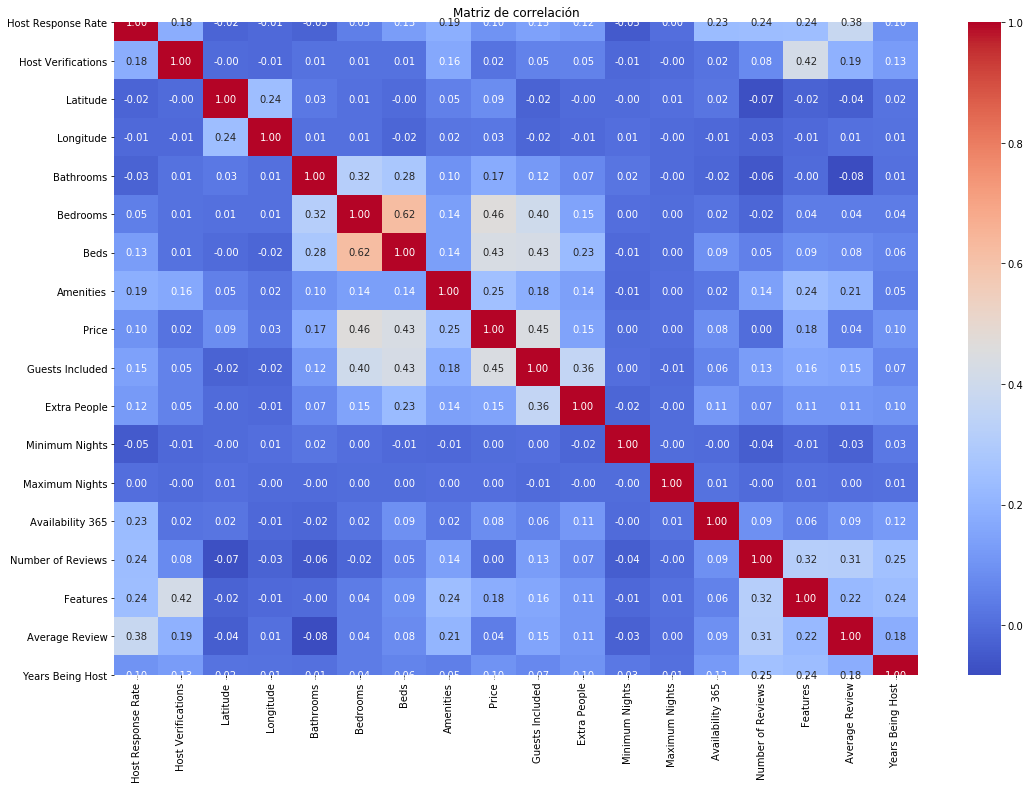

In [136]:
# Calcula la matriz de correlación y aplica el estilo de gradiente de color
corr_matrix = df.corr()
styled_corr_matrix = corr_matrix.style.background_gradient(cmap='coolwarm')

# Configura el estilo de la tabla para reducir el tamaño
styled_corr_matrix.set_table_styles([{'selector': 'table', 'props': [('font-size', '10pt')]}])

# Muestra el gráfico
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


Como podemos observar en la gráfica superior, las categorías que mayor correlación positiva tienen entre ellas son:
- Beds y Bedrooms: Esto indica que a medida que aumenta el número de camas (Beds), también tiende a aumentar el número de habitaciones (Bedrooms). Esto tiene sentido, ya que normalmente una habitación tendrá al menos una cama.
- Price y Bedrooms: Esto sugiere que hay una relación entre el precio de una estancia y el número de habitaciones. Es posible que las propiedades con más habitaciones tiendan a tener un precio más alto.
- Guests included y Beds:Esto indica que cuando se incluye un mayor número de huéspedes en la reserva, es probable que también se aumente el número de camas disponibles. Esto tiene sentido, ya que es probable que un mayor número de huéspedes requiera más camas para alojarse.
- Guests includad y Bedrooms:  Similar al punto anterior, esto sugiere que cuando se incluye un mayor número de huéspedes en la reserva, es probable que también se aumente el número de habitaciones. Esto tiene sentido, ya que más huéspedes requerirían más espacio para alojarse.
- Guests included y Prices: Esto indica que a medida que aumenta el número de huéspedes incluidos en la reserva, es probable que también aumente el precio. Es posible que las propiedades cobren un costo adicional por cada huésped adicional.
- Average Review y Host Response Rate: Esto sugiere que existe una relación entre la calificación promedio de las reseñas de una propiedad y la tasa de respuesta del anfitrión. Es posible que los anfitriones con una alta tasa de respuesta también brinden un mejor servicio, lo que se refleja en una calificación promedio más alta por parte de los huéspedes.

## 4.Creamos Dummies  

En la siguiente celda podemos observar las diferentes columnas del dataframe:

In [36]:
df.columns

Index(['Host Response Time', 'Host Response Rate', 'Host Verifications',
       'City', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy', 'Features',
       'Average Review', 'Final Neighbourhood', 'Years Being Host'],
      dtype='object')

Esta celda convierte variables categóricas en binarias y luego reemplaza las columnas originales del DataFrame original con estas nuevas variables binarias. Esto puede ser útil para realizar análisis o modelado utilizando algoritmos que requieren variables numéricas en lugar de categóricas.

In [37]:
property_type = pd.get_dummies(df['Property Type']).astype(int)
room_type= pd.get_dummies(df['Room Type']).astype(int)
bed_type= pd.get_dummies(df['Bed Type']).astype(int)
cancel_policy = pd.get_dummies(df['Cancellation Policy']).astype(int)
host_response_time = pd.get_dummies(df['Host Response Time']).astype(int)



#eliminamos las columnas originales y las sustituimos por las nuevas
df = df.drop(['Cancellation Policy', 'Property Type', 'Room Type', 'Bed Type', 'Host Response Time'], axis = 1)
df = pd.concat((df, cancel_policy, property_type, room_type, bed_type, host_response_time), axis = 1)

In [38]:
df2 = df

Eliminamos las colunmas City y Final Neighbourhood

In [39]:
df = df.drop(['City'], axis = 1)
df = df.drop(['Final Neighbourhood'], axis = 1)

Así es como quedaría el dataframe:

In [40]:
df.head()

Host Response Rate  Host Verifications   Latitude  Longitude  Bathrooms  \
40  84.0                3                   40.406953 -3.670894   2.0         
41  100.0               3                   40.425904 -3.681647   1.0         
42  100.0               5                   40.428352 -3.687155   1.0         
43  100.0               3                   40.427454 -3.685763   1.0         
44  100.0               5                   40.428671 -3.685423   1.0         

    Bedrooms  Beds  Amenities  Price Security Deposit  ... Shared room  \
40  1.0       1.0   7          28.0   0.00             ...  0            
41  0.0       1.0   13         58.0   100.0            ...  0            
42  0.0       2.0   17         70.0   150.0            ...  0            
43  1.0       1.0   11         26.0   0.00             ...  0            
44  2.0       3.0   21         70.0   0.00             ...  0            

    Airbed  Couch  Futon  Pull-out Sofa  Real Bed  a few days or more  \
40  0       0      0      0              1         0                    
41  0       0      0      0              1         0                    
42  0       0      0      0              1         0                    
43  0       0      0      0              1         0                    
44  0       0      0      0              1         0                    

    within a day  within a few hours  within an hour  
40  0             0                   1               
41  0             1                   0               
42  0             0                   1               
43  0             0                   1               
44  0             0                   1               

[5 rows x 42 columns]

## 5.División del dataframe en Train y Test


Esta celda divide los datos en conjuntos de entrenamiento y prueba para su posterior uso en el modelado o análisis de datos.

In [41]:
# create target and features
a = df.drop(['Price'], axis = 1)
b = df.Price

# split our data
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=13)

Esta celda estandariza las características de los conjuntos de entrenamiento y prueba utilizando la técnica de escala estándar, lo que ayuda a asegurar que todas las características estén en la misma escala y tengan una distribución similar. Esto es comúnmente utilizado en algoritmos de machine learning que asumen que las características están normalmente distribuidas y tienen varianzas comparables.

In [42]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

## 6.Aplicamos distintos Algoritmos

### 6.1. Regresión Lineal 

La siguiente celda de código realiza una regresión lineal utilizando el modelo de regresión lineal de scikit-learn. Se ajusta el modelo a los datos de entrenamiento, se calcula el coeficiente de determinación R^2 para evaluar el rendimiento del modelo en el conjunto de prueba y se realizan predicciones tanto en el conjunto de prueba como en el conjunto de entrenamiento. Finalmente, se imprime en pantalla el valor del coeficiente de determinación R^2 obtenido.

In [43]:
# linear regression testing
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
r2_lr = metrics.r2_score(y_test, reg.predict(X_test))

y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

print (f"r2: {round(r2_lr, 5)}")

r2: 0.59411


La siguiente celda, muestra dos scatter plots de la predicción de valores frente a los valores actuales, mostrando el test set y el train set.

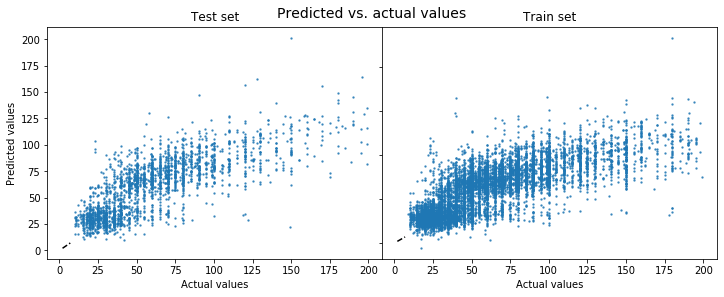

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
plt.subplots_adjust(top=0.93, wspace=0)
    
ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
ax1.set_title('Test set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')
    
ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')

plt.show()

Las siguientes dos celdas ajustan un modelo de regresión lineal utilizando los datos de entrenamiento X_train y y_train.

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
lr.score(X_train, y_train)

0.5897608998381769

In [48]:
lr.score(X_test,y_test)

0.594114931227745

 El valor obtenido para lr.score(X_train, y_train) es de 0.5897608998381769, lo cual indica que el modelo explica aproximadamente el 58.98% de la variabilidad en los datos de entrenamiento. Por otro lado, el valor obtenido para lr.score(X_test, y_test) es de 0.594114931227745, lo cual indica que el modelo explica aproximadamente el 59.41% de la variabilidad en los datos de prueba.

Otra forma de hacerlo

In [49]:
data_train, data_test = train_test_split(df, test_size = 0.2)

In [50]:
X_train = data_train.drop(columns='Price')
y_train = data_train['Price']

In [51]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [52]:
X_train_scaled = scaler.transform(X_train)

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [55]:
lr.score(X_train_scaled,y_train)

0.5869595214633798

In [56]:
X_test = data_test.drop(columns='Price')
y_test = data_test['Price']
X_test_scaled = scaler.transform(X_test)

In [57]:
predictions = lr.predict(X_test_scaled)

In [58]:
lr.score(X_test_scaled,y_test)

0.5971556860835096

In [59]:
results_df = ( data_test
    .loc[:,['Price']]
    .assign(PricePredicted=predictions)
    .assign(SquaredError=lambda x:(x.Price - x.PricePredicted)**2)
)

In [60]:
results_df

Price  PricePredicted  SquaredError
13910  70.0   80.504476       110.344009  
3782   45.0   38.041585       48.419539   
13481  23.0   22.377523       0.387478    
12277  50.0   22.832601       738.067586  
1205   60.0   39.578694       417.029721  
...     ...         ...              ...  
12519  40.0   75.184163       1237.925339 
10170  75.0   91.295491       265.543037  
11218  30.0   29.297444       0.493584    
1473   50.0   90.559163       1645.045718 
6029   50.0   63.664632       186.722166  

[2385 rows x 3 columns]

RMSE (Root Mean Squared Error) es una medida de la precisión de un modelo de regresión. se utiliza comúnmente para evaluar la calidad de las predicciones en problemas de regresión. Cuanto menor sea el valor del RMSE, mejor será la capacidad del modelo para ajustarse a los datos y realizar predicciones precisas.

In [61]:
rmse_1 = np.sqrt(results_df['SquaredError'].mean())
rmse_1

23.351947511407747

In [62]:
rmse_2 = mean_squared_error(results_df['Price'], results_df['PricePredicted'], squared=False)
rmse_2

23.351947511407737

El modelo de regresión lineal cuenta con un RMSE de 23.35 y un error medio de 38.1

In [63]:
# porcentaje de error medio #
ratio_error = round(rmse_2/results_df['Price'].mean()*100,2)
ratio_error

38.1

### 6.2. Árboles de Decisión

Vamos a utilizar el método de Árboles de Decisión, para el cual no es necesario utilizar los datos estandarizados. El método de árboles de decisión construye un modelo predictivo utilizando un enfoque basado en reglas de decisión para resolver problemas de clasificación y de regresión. Se basa en la idea de crear un modelo en forma de árbol, donde cada nodo interno representa una característica o atributo, cada rama representa una posible decisión o resultado y cada hoja representa una clase o valor de salida.

In [64]:
# using a decision tree regressor
# using a tree with max depth. 
# it will provoque overfitting.

dtree = DecisionTreeRegressor()

In [65]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [66]:
dtree.score(X_train, y_train)

1.0

In [67]:
dtree.score(X_test, y_test)

0.48536932427803636

In [68]:
dtree2 = DecisionTreeRegressor(max_depth=6)


In [69]:
dtree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [70]:
dtree2.score(X_train, y_train)

0.6613863410035794

In [71]:
dtree2.score(X_test, y_test)

0.6300218255730365

In [72]:
predictions_dtree = dtree2.predict(X_test)

Observamos los resultados:

In [73]:
results_dtree = ( data_test
    .loc[:,['Price']]
    .assign(PricePredicted=predictions_dtree)
    .assign(SquaredError=lambda x:(x.Price - x.PricePredicted)**2)
)

In [74]:
results_dtree.head()

Price  PricePredicted  SquaredError
13910  70.0   103.187500      1101.410156 
3782   45.0   40.580311       19.533652   
13481  23.0   27.837010       23.396664   
12277  50.0   34.490385       240.548169  
1205   60.0   25.140426       1215.189932

En la tabla anterior aparecen una serie de precios estimados por este algoritmo, observamos como mayoritariamente se aproximan al precio real, salvo en algunos casos donde el algoritmo ha fallado en la estimación.

In [75]:
rmse_3 = mean_squared_error(results_dtree['Price'], results_dtree['PricePredicted'], squared=False)
rmse_3

22.379096003746184

Arriba hemos calculado el error cuadrático medio, que es una medida de la diferencia entre los valores reales y los valores predichos. Un RMSE más bajo indica un mejor ajuste del modelo a los datos.
En nuestro caso, el resultado del RMSE es de 21.37, lo que significa que, en promedio, las predicciones del modelo de árbol de decisión difieren de los valores reales en aproximadamente 21.37 unidades de la variable "Price". Un RMSE más bajo indicaría una mejor precisión en las predicciones, sin embargo, este valor es correcto y nuestro algoritmo predice solventemente los precios.

In [76]:
# porcentaje de error medio #
ratio_error_2 = round(rmse_3/results_dtree['Price'].mean()*100,2)
ratio_error_2

36.51

Seguidamente hemos calculado el porcentaje de error medio, que es una medida relativa que indica cuánto difieren en promedio las predicciones del modelo de árbol de decisión de los valores reales, expresado como un porcentaje del valor medio de la variable "Price". Un porcentaje de error medio más bajo indica un mejor ajuste y una mayor precisión del modelo.
En nuestro caso, el resultado del porcentaje de error medio es de 35.6, lo que significa que, en promedio, las predicciones del modelo de árbol de decisión difieren del valor medio de la variable "Price" en aproximadamente el 35.6%.

### 6.3. K-NN

En este apartado estimaremos el KNN, debemos utilizar los datos estandarizados. Se trata de un algoritmo de aprendizaje automático supervisado que se basa en la idea de que los ejemplos similares tienden a tener etiquetas similares.

In [77]:
# apply k-nn method

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn.score(X_train_scaled, y_train)

0.757912093999703

In [78]:
knn.score(X_test_scaled, y_test)

0.6377132761947207

In [79]:
# evaluate the model
predictions_knn = knn.predict(X_test_scaled)

Observamos los resultados:

In [80]:
# create a dataframe with the results
results_knn = ( data_test
    .loc[:,['Price']]
    .assign(PricePredicted=predictions_knn)
    .assign(SquaredError=lambda x:(x.Price - x.PricePredicted)**2)
)


In [81]:
results_knn.head()

Price  PricePredicted  SquaredError
13910  70.0   63.2            46.24       
3782   45.0   48.8            14.44       
13481  23.0   31.2            67.24       
12277  50.0   38.0            144.00      
1205   60.0   50.8            84.64

En este caso podemos observar como los precios predichos del modelo mediante KNN se aproximan mucho a los reales.

In [82]:
# mean squared error
rmse_4 = mean_squared_error(results_knn['Price'], results_knn['PricePredicted'], squared=False)
rmse_4

22.14525555995039

Hemos calculado de nuevo el error medio cuadrático y hemos obtenido un 22.14% que indica que nuestro modelo por Árboles de Decisión estima peor los precios que el modelo mediante KNN. Lo que significa que, en promedio, las predicciones del modelo de árbol de decisión difieren de los valores reales en aproximadamente 22.14 unidades de la variable "Price".

In [83]:
# porcentaje de error medio #
ratio_error_3 = round(rmse_4/results_knn['Price'].mean()*100,2)
ratio_error_3

36.13

A continuación haremos una tabla con los tres modelos para comparar los resultados:

In [84]:
models = ['Linear Regression', 'Decision Tree', 'K-nn']
rmse = [rmse_1, rmse_3, rmse_4]
ratio_error_vec = [ratio_error, ratio_error_2, ratio_error_3]
summary_df = pd.DataFrame({'Model':models, 'RMSE':rmse, 'Ratio Error':ratio_error_vec}).round(2)
summary_df.head()

Model   RMSE  Ratio Error
0  Linear Regression  23.35  38.10      
1  Decision Tree      22.38  36.51      
2  K-nn               22.15  36.13

Por ahora el modelo que mejor predice el precio es KNN, con un RMSE de 22.15 y un ratio error de 36.13

In [85]:
# Modeling using random forest

rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=0, )
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.8228967765649808

El resultado obtenido es 0.8228967765649808, lo que significa que el modelo de Random Forest ajustado explica aproximadamente el 82.28% de la varianza en los datos de entrenamiento. Esto indica un buen ajuste del modelo en relación a los datos utilizados para entrenarlo.

In [86]:
rmse_5 = mean_squared_error(y_test, rf.predict(X_test), squared=False)
ratio_error_5 = round(rmse_5/y_test.mean()*100,2)
summary_df = summary_df.append({'Model':'Random Forest', 'RMSE':rmse_5, 'Ratio Error':ratio_error_5}, ignore_index=True)
summary_df

Model       RMSE  Ratio Error
0  Linear Regression  23.350000  38.10      
1  Decision Tree      22.380000  36.51      
2  K-nn               22.150000  36.13      
3  Random Forest      19.630252  32.03

Tras haber estimado mediante Random Forest, deducimos que éste es el mejor estimador por ahora. Con un RMSE de 19.63 y un ratio error de 32.03

### 6.4. Gradient Boosting

El Gradient Boosting se trata de una técnica de ensamblado que combina múltiples modelos de aprendizaje débiles para formar un modelo más fuerte y preciso.
A diferencia de otros algoritmos de ensamblado, como el Random Forest, que construyen múltiples árboles de decisión independientes, el Gradient Boosting construye los árboles de decisión de forma secuencial. Cada nuevo árbol se ajusta a los errores residuales del modelo anterior, intentando corregir las deficiencias del modelo anterior. De esta manera, el modelo final es una combinación ponderada de múltiples árboles, donde cada árbol se ajusta para mejorar la precisión del modelo en los casos en los que los modelos anteriores fallaron.

In [87]:
'''Gradient Boosted Regressor'''
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=3000)

In [88]:
'''Get Predictions & Metrics'''
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2) * 100,
        mean_absolute_error(y_test,predicts2)
        ))


        Mean Squared Error: 18.402416270227953
        R2 Score: 74.98268325533435
        Mean Absolute Error: 12.985786823750782
     


Observamos los resultados:

In [89]:
result_Gboost = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts2.flatten()}).head(20)

result_Gboost.head(5)

Actual Values  Predicted Values
0  70.0           101.903466      
1  45.0           47.013758       
2  23.0           26.129667       
3  50.0           40.240120       
4  60.0           41.742270

In [90]:
rmse_6 = mean_squared_error(result_Gboost['Actual Values'], result_Gboost['Predicted Values'], squared=False)
rmse_6

21.648452989835985

In [91]:
ratio_error_5 = round(rmse_6/result_Gboost['Actual Values'].mean()*100,2)
ratio_error_5

31.06

In [92]:
summary_df = summary_df.append({'Model':'Gradient Boost', 'RMSE':rmse_6, 'Ratio Error':ratio_error_5}, ignore_index=True)
summary_df

Model       RMSE  Ratio Error
0  Linear Regression  23.350000  38.10      
1  Decision Tree      22.380000  36.51      
2  K-nn               22.150000  36.13      
3  Random Forest      19.630252  32.03      
4  Gradient Boost     21.648453  31.06

El modelo estimado mediante Gradient Boost muestro los mejores resultados con un RMSE de tan solo un 21.64 y un ratio error de 31.06.

In [ ]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

In [ ]:
plt.figure(figsize=(16,8))
sns.regplot(predicts2,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()

### 6.5. Bagging

In [94]:

# Crear un modelo de regresión de árbol de decisión para el bagging
base_model = DecisionTreeRegressor()

# Crear el modelo de bagging
bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=42)

# Entrenar el modelo de bagging
bagging_model.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = np.around(bagging_model.predict(X_test),2)


# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio: {:.2f}".format(mae))

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio: {:.2f}".format(mse))

Error absoluto medio: 13.74
Error cuadrático medio: 388.52


El valor del error absoluto medio obtenido es de 13.74. Esto indica que, en promedio, las predicciones del modelo tienen una diferencia absoluta de 13.74 unidades respecto a los valores reales en el conjunto de prueba.
El valor del error cuadrático medio obtenido es de 388.52. El MSE es una medida de la calidad de las predicciones al calcular el promedio de los errores al cuadrado. Cuanto menor sea su valor, mejor será el rendimiento del modelo en términos de la precisión de las predicciones.

In [95]:
predicciones_bagging = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred.flatten()}).head(20)

predicciones_bagging.head(5)

Actual Values  Predicted Values
0  70.0           99.4            
1  45.0           45.0            
2  23.0           25.8            
3  50.0           40.9            
4  60.0           31.3

In [96]:
rmse_7 = mean_squared_error(predicciones_bagging['Actual Values'], predicciones_bagging['Predicted Values'], squared=False)
rmse_7

24.823315652829297

El modelo bagging cuenta con un RMSE de 24.82 y un error medio de 35.61

In [97]:
ratio_error_6 = round(rmse_7/predicciones_bagging['Actual Values'].mean()*100,2)
ratio_error_6

35.61

In [98]:
summary_df = summary_df.append({'Model':'Bagging', 'RMSE':rmse_7, 'Ratio Error':ratio_error_6}, ignore_index=True)
summary_df

Model       RMSE  Ratio Error
0  Linear Regression  23.350000  38.10      
1  Decision Tree      22.380000  36.51      
2  K-nn               22.150000  36.13      
3  Random Forest      19.630252  32.03      
4  Gradient Boost     21.648453  31.06      
5  Bagging            24.823316  35.61

### 6.6. Boosting

La siguiente celda de código ajusta un modelo de regresión mediante el algoritmo de Gradient Boosting. Se utiliza un modelo con 100 estimadores (árboles de decisión), una profundidad máxima de 3, una tasa de aprendizaje de 0.1 y una semilla aleatoria de 42.

In [99]:
boosting_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Entrenar el modelo de boosting
boosting_model.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = boosting_model.predict(X_test).round(2)

# Agregar las predicciones a la tabla de prueba
X_test['precio_boosting'] = y_pred


# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio: {:.2f}".format(mae))

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio: {:.2f}".format(mse))



Error absoluto medio: 13.56
Error cuadrático medio: 365.63


El error absoluto medio  de 13.56 indica que, en promedio, las predicciones del modelo difieren en 13.56 unidades del valor real. El error cuadrático medio  de 365.63 representa la media de los errores al cuadrado, lo cual indica que el modelo tiene una variabilidad pronunciada en la precisión de las predicciones. En general, se busca minimizar tanto el error absoluto medio  como el error cuadrático medio para obtener un modelo más preciso.

In [100]:
predicciones_boosting = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred.flatten()}).head(20)

predicciones_boosting.head(5)

Actual Values  Predicted Values
0  70.0           104.82          
1  45.0           43.63           
2  23.0           26.17           
3  50.0           37.85           
4  60.0           39.11

In [101]:
rmse_8 = mean_squared_error(predicciones_boosting['Actual Values'], predicciones_boosting['Predicted Values'], squared=False)
rmse_8

24.273777724120322

El modelo boosting cuenta con un RMSE de 24.27 y un error medio de 34.83

In [102]:
ratio_error_7 = round(rmse_8/predicciones_boosting['Actual Values'].mean()*100,2)
ratio_error_7

34.83

In [103]:
summary_df = summary_df.append({'Model':'Boosting', 'RMSE':rmse_8, 'Ratio Error':ratio_error_7}, ignore_index=True)
summary_df

Model       RMSE  Ratio Error
0  Linear Regression  23.350000  38.10      
1  Decision Tree      22.380000  36.51      
2  K-nn               22.150000  36.13      
3  Random Forest      19.630252  32.03      
4  Gradient Boost     21.648453  31.06      
5  Bagging            24.823316  35.61      
6  Boosting           24.273778  34.83

## 7.Clustering

In [104]:
# Definir el número de clusters
k = 3

# KMeans
km = KMeans(n_clusters=k, random_state=42)
km_labels = km.fit_predict(df)

# Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters=k)
ac_labels = ac.fit_predict(df)

# Birch
birch = Birch(n_clusters=k)
birch_labels = birch.fit_predict(df)

# Spectral Clustering
sc = SpectralClustering(n_clusters=k, affinity='nearest_neighbors')
sc_labels = sc.fit_predict(df)

# Calcular el puntaje de silueta para evaluar los resultados del clustering
print(f"KMeans Silhouette Score: {silhouette_score(df, km_labels)}")
print(f"Agglomerative Clustering Silhouette Score: {silhouette_score(df, ac_labels)}")
print(f"Birch Silhouette Score: {silhouette_score(df, birch_labels)}")
print(f"Spectral Clustering Silhouette Score: {silhouette_score(df, sc_labels)}")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


KMeans Silhouette Score: 0.9938465467134879
Agglomerative Clustering Silhouette Score: 0.9938465467134879
Birch Silhouette Score: 0.9938465467134879
Spectral Clustering Silhouette Score: -0.015773345387094028


El Silhouette Score de un Cluster varía entre -1 y 1, donde un valor más cercano a 1 indica una mejor calidad de clustering.
En nuestro caso, los resultados muestran el Silhouette Score obtenido para diferentes algoritmos de clustering aplicados a tus datos.
KMeans Silhouette Score: 0.9938465467134879: indica que el algoritmo K-means ha producido clusters con una alta cohesión interna y una buena separación entre los clusters. Un valor cercano a 1 indica que los objetos dentro de los clusters son muy similares entre sí y están bien separados de los objetos de otros clusters.